# Exploratory Data Analysis of Istanbul Airbnb Data

## Import Required Packages

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt
from scipy.stats import iqr, skew, kurtosis
import contextily as ctx #Used in conjuction with matplotlib/geopandas to set a basemap

## Load Data

In [2]:
import_fp = Path("../data/processed/istanbul_airbnb_processed.csv")
airbnb_df = pd.read_csv(import_fp, encoding = "utf-8-sig")

import_fp = Path("../data/processed/istanbul_airbnb_processed_shapefile.shp")
airbnb_gdf = gpd.read_file(import_fp)

import_fp = Path("../data/external/district_income.xlsx")
extra_stats_df = pd.read_excel(import_fp, sheet_name = "main")

import_fp = Path("../data/external/istanbul_districts.shp")
istanbul_districts_gdf = gpd.read_file(import_fp)

## Summary Statistics

### Get column names

In [3]:
column_names = airbnb_df.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'district_eng',
       'latitude', 'longitude', 'room_type', 'price', 'district_tr'],
      dtype='object')

### Summary statistics without normalization

#### Arithmetic Mean, Median and Mode for Price

In [4]:
airbnb_mean_price = airbnb_df.loc[:,"price"].mean()
airbnb_median_price = airbnb_df.loc[:,"price"].median()
airbnb_mode_price = airbnb_df.loc[:,"price"].mode()[0]
print(airbnb_mean_price, airbnb_median_price, airbnb_mode_price)

379.7643146796431 212.0 103


#### Minimum price and Maximum Price

In [5]:
airbnb_min_max_price = (airbnb_df.loc[:,"price"].min(), airbnb_df.loc[:,"price"].max())
airbnb_min_max_price 

(18, 67609)

#### Price IQR and SD

In [6]:
airbnb_price_iqr = iqr(airbnb_df.loc[:,"price"], axis = 0)
airbnb_price_sd = np.std(airbnb_df.loc[:,"price"], axis = 0)
print(airbnb_price_iqr, airbnb_price_sd)

254.0 1286.6569838490234


#### Price Skewness and Kurtosis

In [7]:
airbnb_price_skewness = skew(airbnb_df.loc[:,"price"], axis = 0)
airbnb_price_kurtosis = kurtosis(airbnb_df.loc[:,"price"], axis = 0, fisher = False)
print(airbnb_price_skewness, airbnb_price_kurtosis)

33.74442853259717 1530.678285904718


#### Plotting out the distribution --- normal values --- KDEplot + histogram

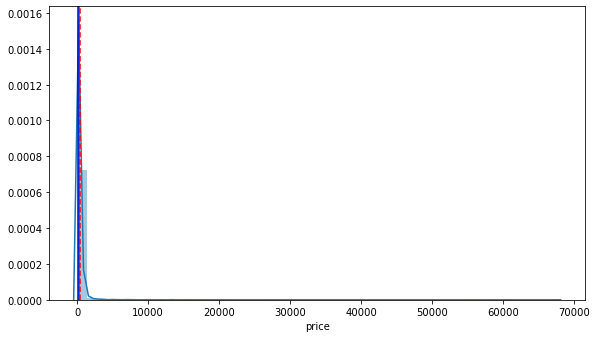

In [8]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.distplot(airbnb_df.loc[:,"price"],
            ax = ax,
            kde = True)

ax.axvline(airbnb_mean_price, color='r', linestyle='--')
ax.axvline(airbnb_median_price, color='g', linestyle='-')
ax.axvline(airbnb_mode_price, color='b', linestyle='-')

#### Plotting out the distribution --- normal values -- violinplot + stripplot

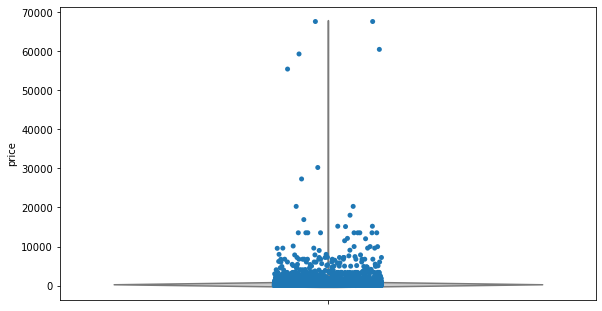

In [9]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.violinplot(y = airbnb_df.loc[:,"price"],
            ax = ax,
              color = ".8")

sns.stripplot(y = airbnb_df.loc[:,"price"],
            ax = ax)

#### Plotting out the distribution --- values transformed by log10

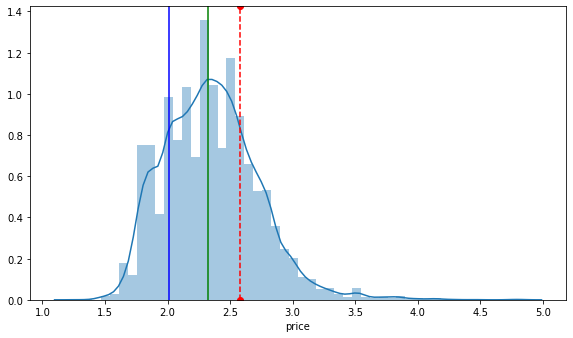

In [10]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.distplot(np.log10(airbnb_df.loc[:,"price"]),
            ax = ax,
            kde = True)
# Mode, Median and Mean will have to get log10 treatment too

ax.axvline(np.log10(airbnb_mean_price), color='r', linestyle='--', marker = "o")
ax.axvline(np.log10(airbnb_median_price), color='g', linestyle='-')
ax.axvline(np.log10(airbnb_mode_price), color='b', linestyle='-')

#### Plotting out the distribution --- values transformed by log10 -- violinplot + stripplot

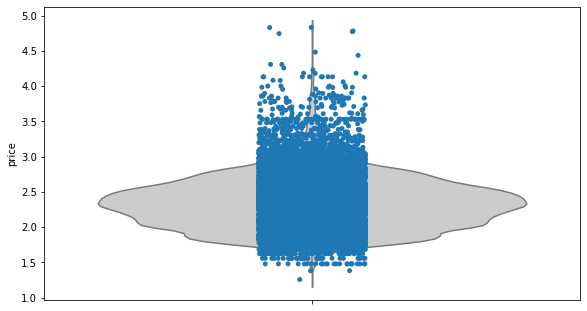

In [11]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.violinplot(y = np.log10(airbnb_df.loc[:,"price"]),
            ax = ax,
              color = ".8")

sns.stripplot(y = np.log10(airbnb_df.loc[:,"price"]),
            ax = ax)

#### Descriptive statistics per district

In [12]:
airbnb_grouped_by_district = airbnb_df.groupby(by = "district_eng")

In [13]:
airbnb_description_per_district = airbnb_grouped_by_district["price"].agg(["count","min", "max","mean","median",iqr,"std", skew, kurtosis]).sort_values(by = "count",
                                                                                                    ascending = False)
airbnb_description_per_district 

,count,min,max,mean,median,iqr,std,skew,kurtosis
district_eng,,,,,,,,,
Beyoglu,4879,30,15203,389.503997,260.0,260.00,687.299778,11.250238,173.573305
Sisli,2707,18,55436,371.013299,206.0,296.00,1317.316796,32.011724,1228.544487
Fatih,2354,24,67609,546.076466,272.0,285.00,2207.306871,21.901232,589.744701
Kadikoy,1895,30,11998,212.068602,139.0,157.00,353.646445,21.177662,659.636423
Besiktas,1533,30,15118,339.360078,206.0,230.00,652.958457,11.884891,208.989222
Uskudar,661,30,20283,278.786687,127.0,163.00,951.037503,16.080725,309.417709
Esenyurt,456,30,60473,395.024123,200.0,175.00,2845.160473,20.735103,434.935151
Kagithane,431,24,4560,235.238979,127.0,223.00,304.125702,7.446658,94.538045
Sariyer,323,30,18021,818.111455,206.0,496.00,1829.254712,4.877879,31.457327


In [14]:
airbnb_districts_prices = airbnb_grouped_by_district["price"]

#### Distribution of price per district

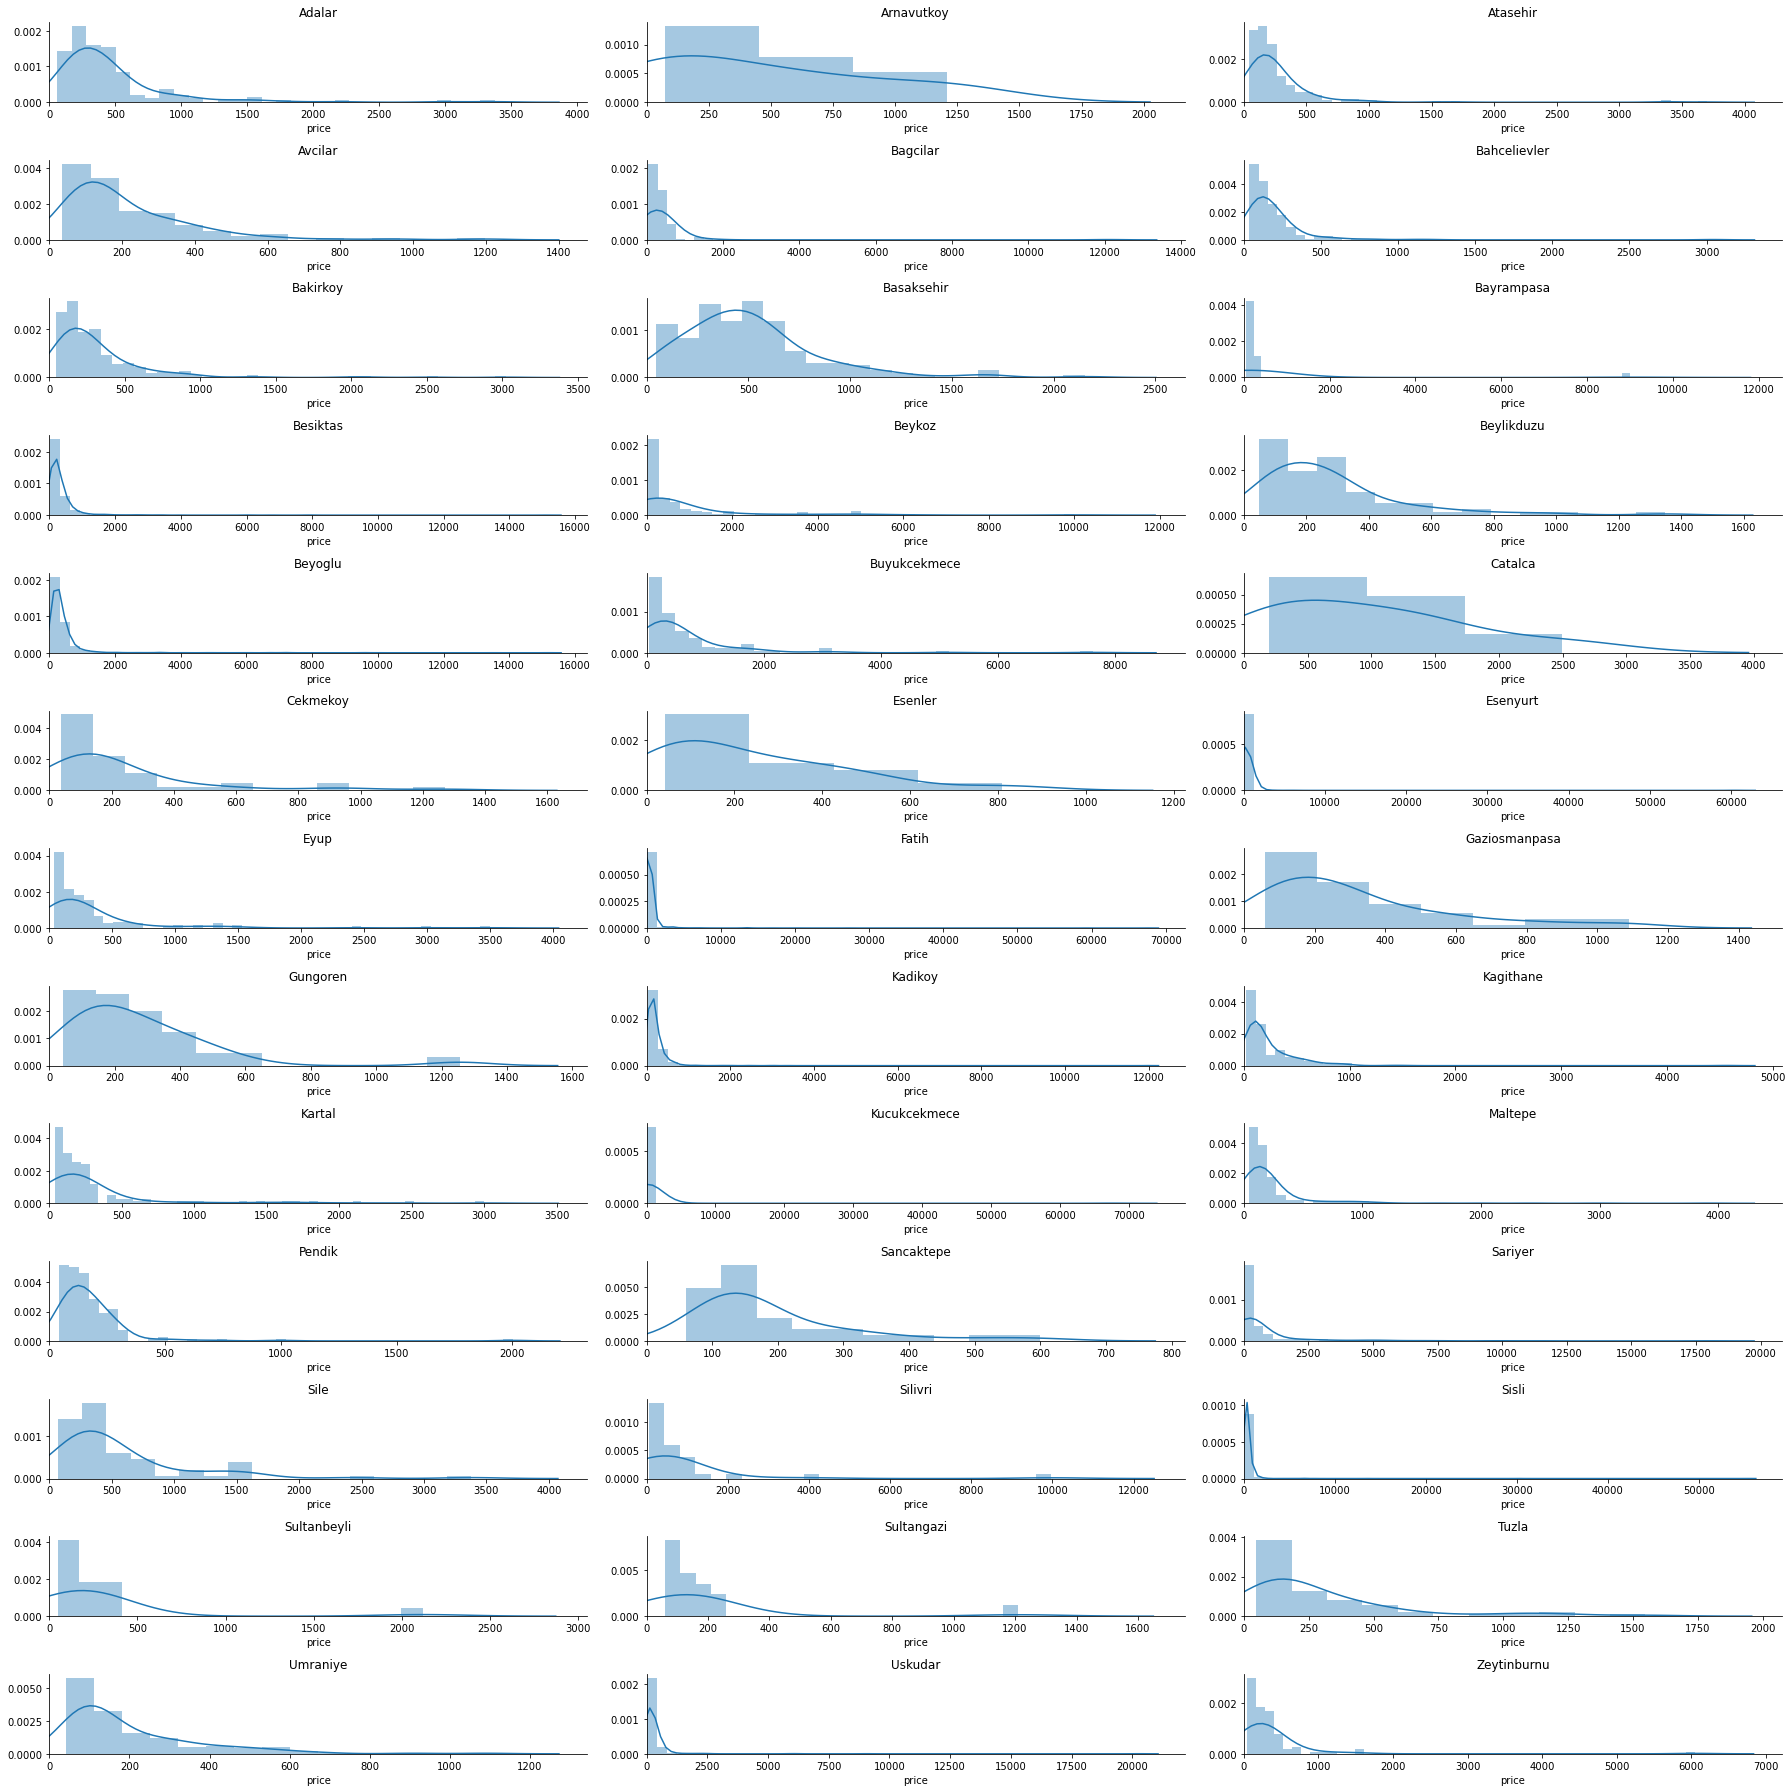

In [15]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    sns.distplot(airbnb_districts_prices.get_group(group),
                ax = ax,
                kde = True,
                hist = True)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1
    

#### Distribution of price per district --- normal values -- violin plot + strip plot

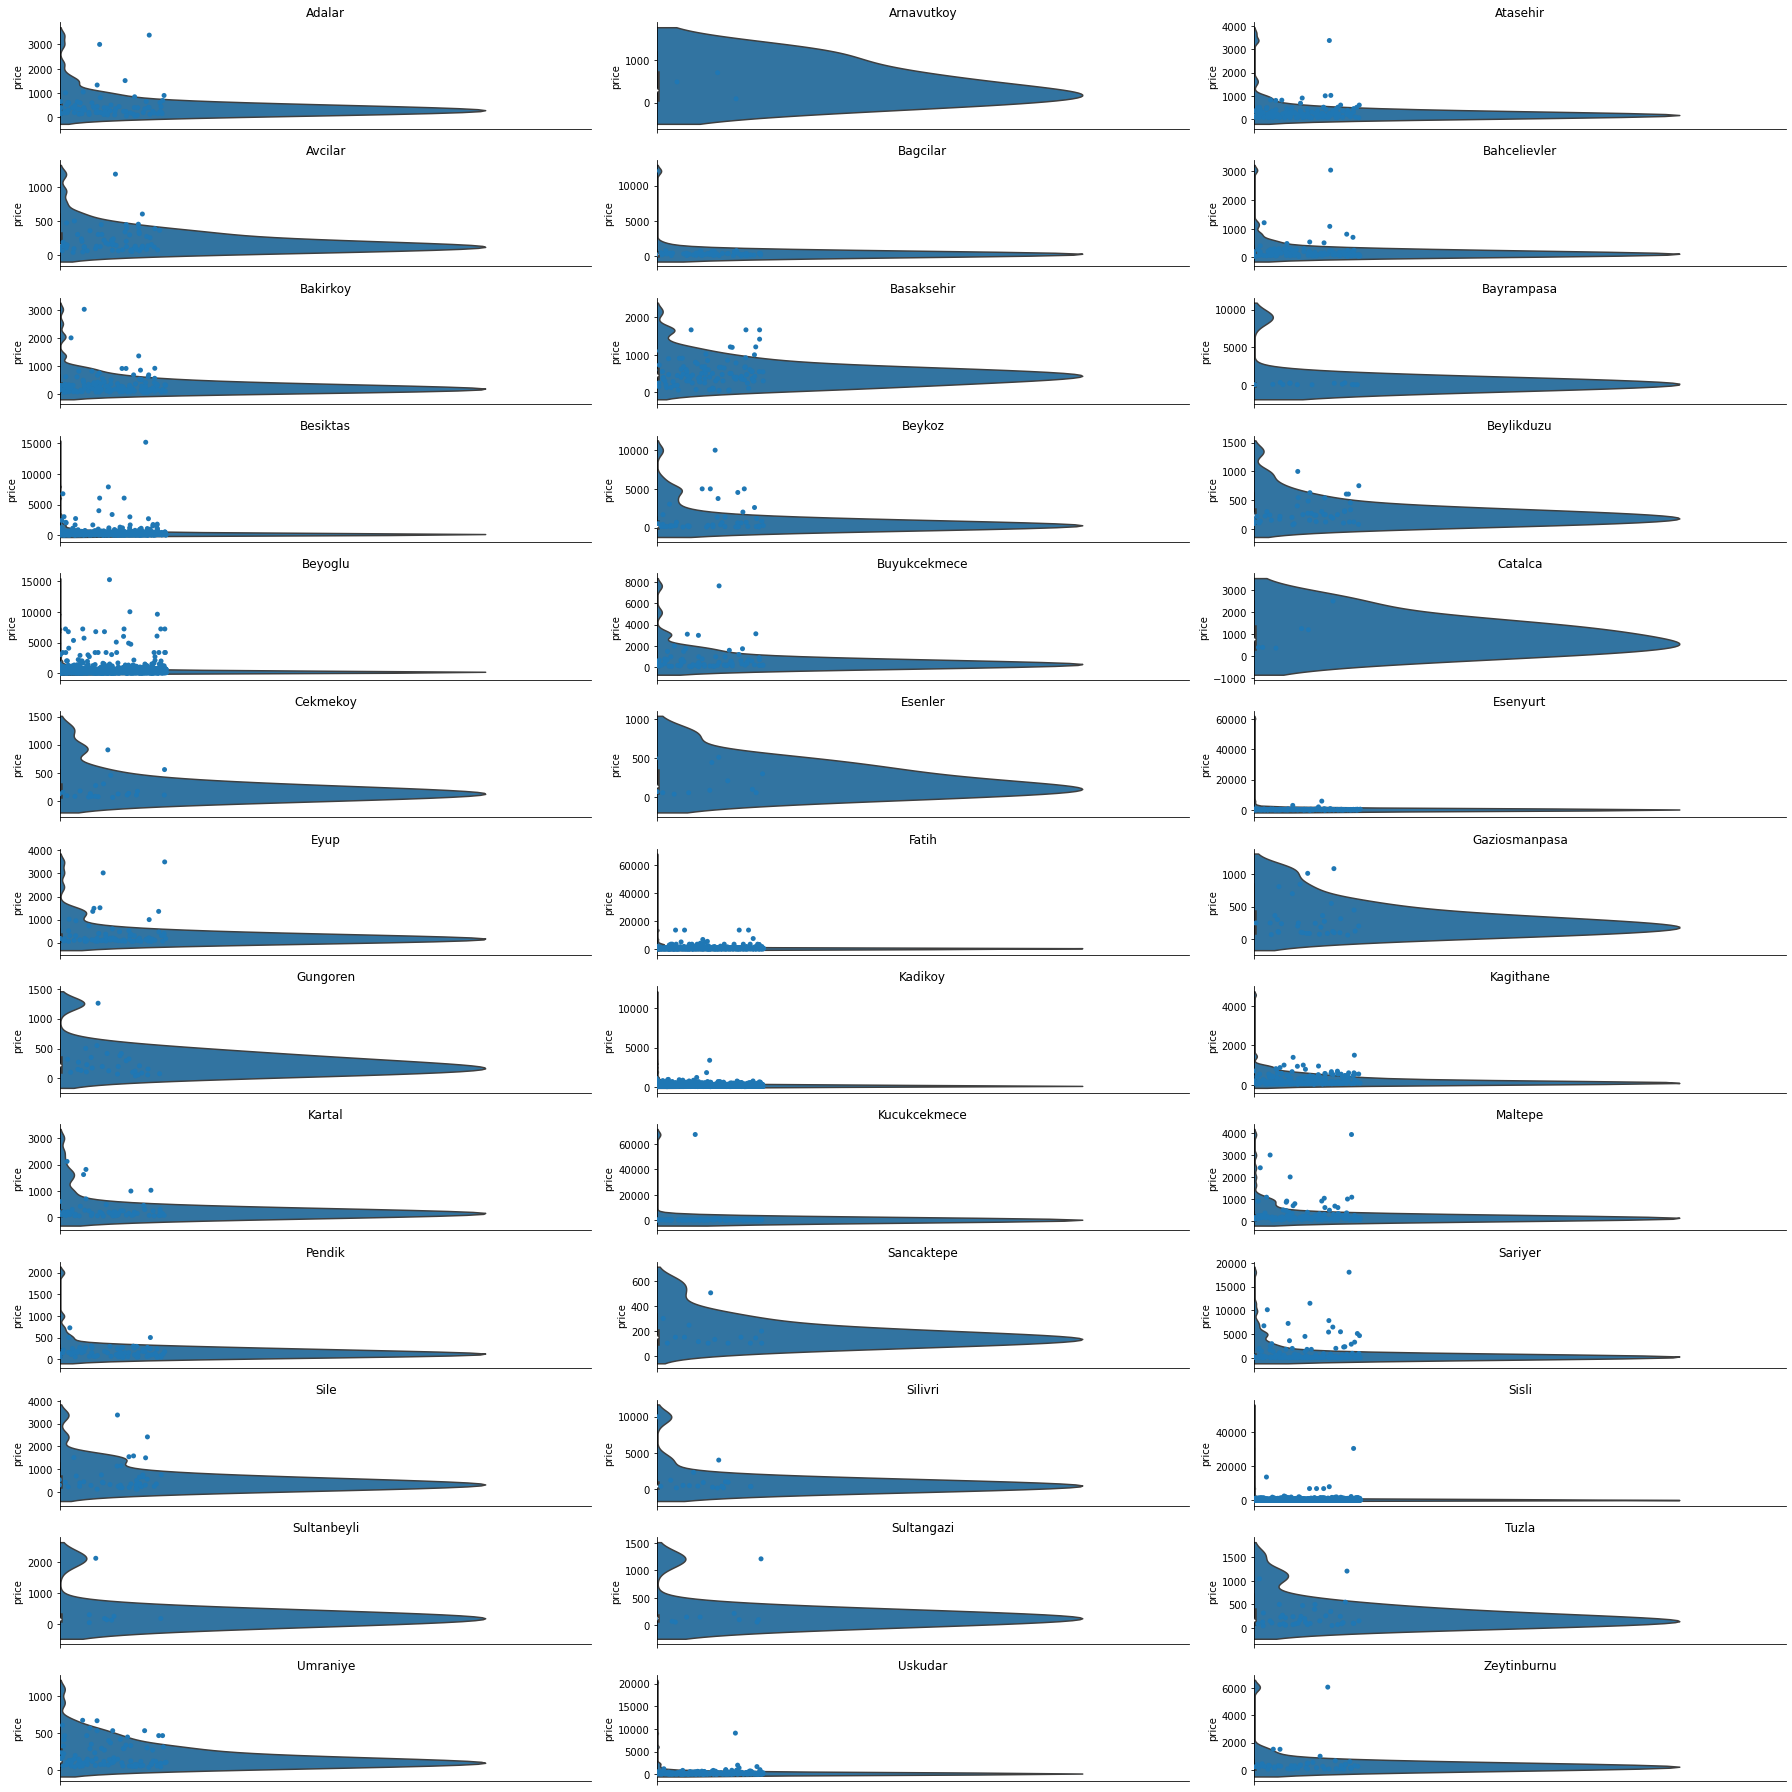

In [16]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    
    sns.violinplot(y = airbnb_districts_prices.get_group(group),
                ax = ax)
    
    sns.stripplot(y = airbnb_districts_prices.get_group(group),
                ax = ax)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1

#### Distribution of prices per district --- values transformed by log10

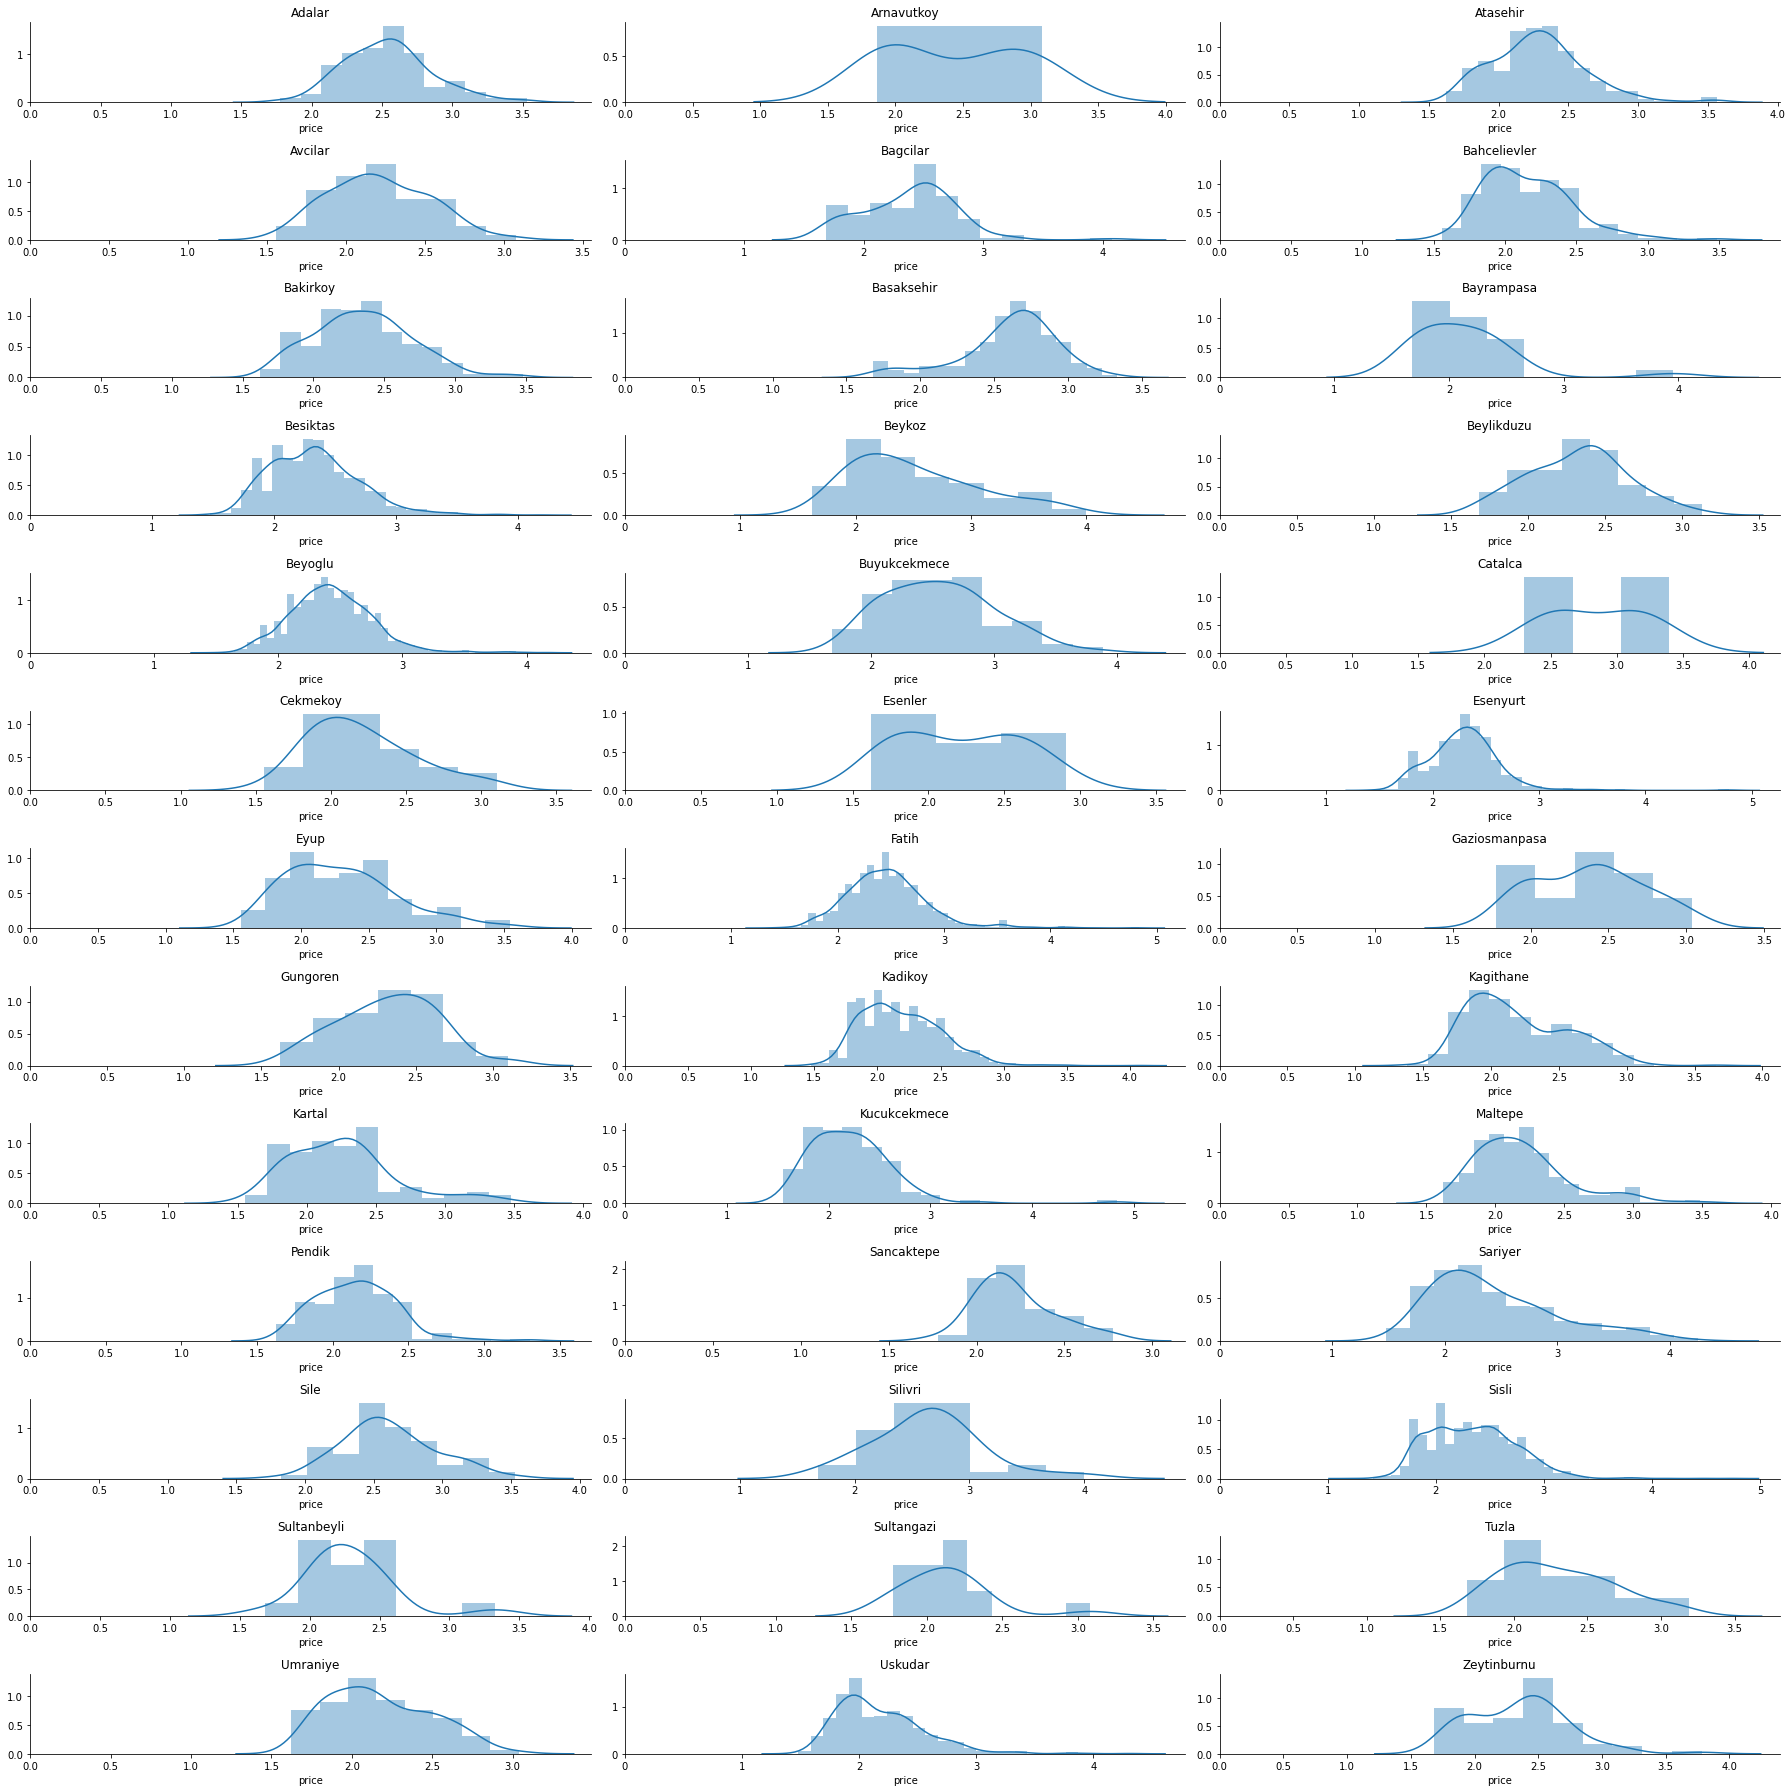

In [17]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    sns.distplot(np.log10(airbnb_districts_prices.get_group(group)),
                ax = ax,
                kde = True,
                hist = True)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1
    

#### Distribution of price per district --- values transformed by log10 -- violin plot + strip plot

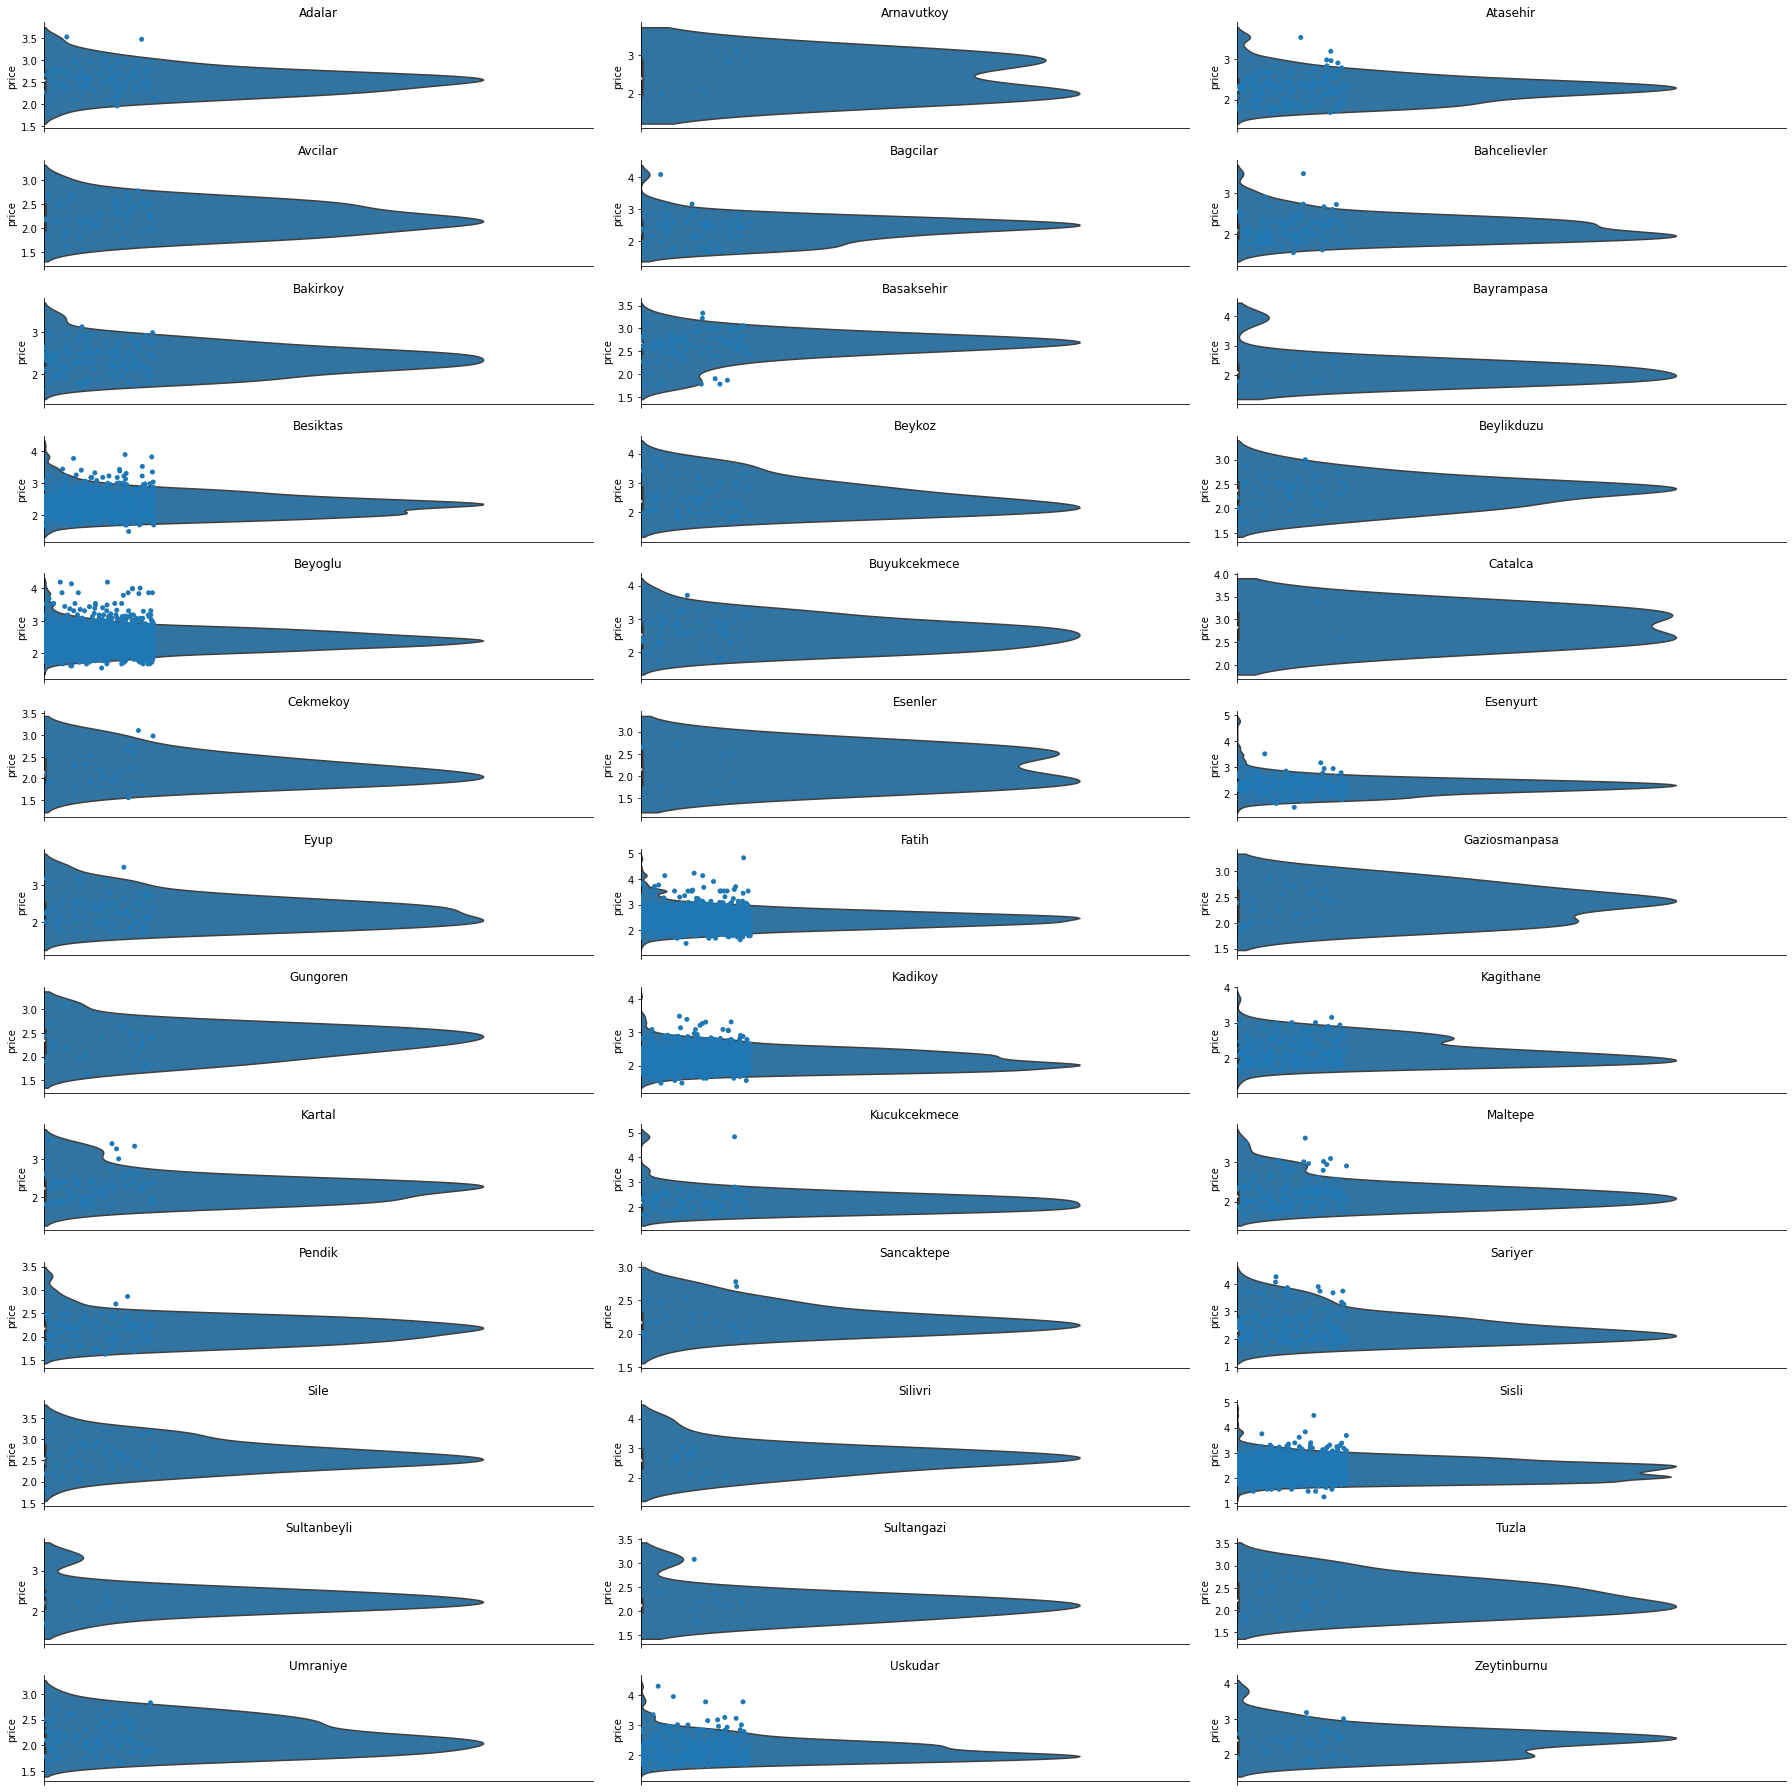

In [18]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    
    sns.violinplot(y = np.log10(airbnb_districts_prices.get_group(group)),
                ax = ax)
    
    sns.stripplot(y = np.log10(airbnb_districts_prices.get_group(group)),
                ax = ax)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1

#### Average rental price per room type 

In [19]:
airbnb_grouped_by_room_type = airbnb_df.groupby("room_type")
airbnb_avg_price_per_room_type = airbnb_grouped_by_room_type["price"].mean().sort_values(ascending = False)
airbnb_avg_price_per_room_type

room_type
Entire home/apt    473.327796
Private room       303.886878
Shared room        163.501859
Name: price, dtype: float64

### Summary statistics for normalization - +- 1.5 IQR as outliers

In [20]:
price_iqr = iqr(airbnb_df.loc[:,"price"], axis = 0)

#Calculate q3 and q1
q1 = airbnb_df["price"].quantile(0.25)
q3 = airbnb_df["price"].quantile(0.75)

In [21]:
#Let's see what the IQR is
print(price_iqr)

254.0


In [22]:
#Create min and max mask for +/* 1.5 IQR
min_mask = airbnb_df.loc[:,"price"] >= q1 - (1.5 * price_iqr)
max_mask = airbnb_df.loc[:,"price"] <= q3 + (1.5 * price_iqr)
#Combine masks
combined_mask = min_mask & max_mask
#Create subset
airbnb_within_iqr_1point5 = airbnb_df.loc[combined_mask]

#### Arithmetic Mean, Median and Mode for Price

In [23]:
airbnb_mean_price = airbnb_within_iqr_1point5.loc[:,"price"].mean()
airbnb_median_price = airbnb_within_iqr_1point5.loc[:,"price"].median()
airbnb_mode_price = airbnb_within_iqr_1point5.loc[:,"price"].mode()[0]
print(airbnb_mean_price, airbnb_median_price, airbnb_mode_price)

244.4016641452345 200.0 103


#### Minimum price and Maximum Price

In [24]:
airbnb_min_max_price = (airbnb_within_iqr_1point5.loc[:,"price"].min(),
                        airbnb_within_iqr_1point5.loc[:,"price"].max())
airbnb_min_max_price 

(18, 756)

#### Price IQR and SD

In [25]:
airbnb_price_iqr = iqr(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
airbnb_price_sd = np.std(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
print(airbnb_price_iqr, airbnb_price_sd)

224.0 165.55718692694484


#### Price Skewness and Kurtosis

In [26]:
airbnb_price_skewness = skew(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
airbnb_price_kurtosis = kurtosis(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0, fisher = False)
print(airbnb_price_skewness, airbnb_price_kurtosis)

1.0604385922025314 3.4206375124169592


#### Plotting out the distribution --- normal values --- KDEplot + histogram

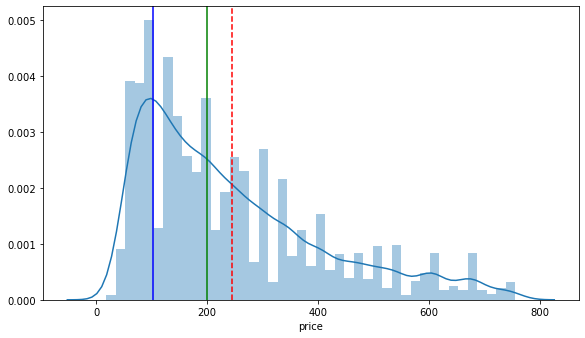

In [27]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.distplot(airbnb_within_iqr_1point5.loc[:,"price"],
            ax = ax,
            kde = True,
            hist = True)

ax.axvline(airbnb_mean_price, color='r', linestyle='--')
ax.axvline(airbnb_median_price, color='g', linestyle='-')
ax.axvline(airbnb_mode_price, color='b', linestyle='-')

#### Plotting out the distribution --- normal values -- violinplot + stripplot

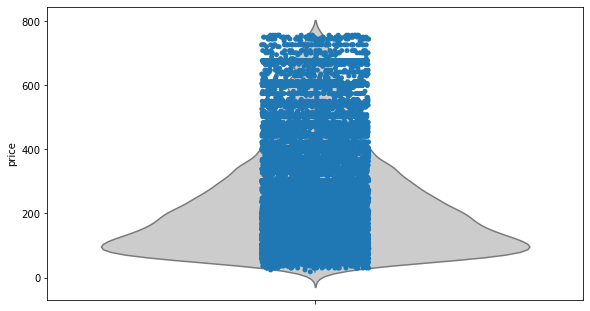

In [28]:
fig = plt.figure(figsize = (9.60, 5.40))

ax = fig.add_subplot(1,1,1)

sns.violinplot(y = airbnb_within_iqr_1point5.loc[:,"price"],
            ax = ax,
              color = ".8")

sns.stripplot(y = airbnb_within_iqr_1point5.loc[:,"price"],
            ax = ax)

In [29]:
airbnb_grouped_by_district = airbnb_within_iqr_1point5.groupby(by = "district_eng")
airbnb_districts_prices = airbnb_grouped_by_district["price"]

In [30]:
airbnb_description_per_district = airbnb_grouped_by_district["price"].agg(["count","min", "max","mean","median",iqr,"std", skew, kurtosis]).sort_values(by = "count",
                                                                                                    ascending = False)
airbnb_description_per_district 

,count,min,max,mean,median,iqr,std,skew,kurtosis
district_eng,,,,,,,,,
Beyoglu,4538,30,756,281.691714,242,212.00,163.081463,0.861456,0.001409
Sisli,2481,18,756,241.950020,187,236.00,177.198710,1.064265,0.277998
Fatih,2116,24,750,284.783554,248,218.00,166.442980,0.813843,-0.062985
Kadikoy,1864,30,756,186.020386,133,151.00,137.184384,1.642084,2.646601
Besiktas,1435,30,756,235.394425,200,199.00,162.401801,1.200136,0.804712
Uskudar,635,30,726,177.856693,121,148.00,145.125106,1.784014,2.872682
Esenyurt,442,30,726,217.074661,194,163.00,129.749790,1.214008,1.631310
Kagithane,413,24,756,195.196126,121,187.00,163.416193,1.414066,1.046372
Atasehir,278,42,677,212.197842,181,167.50,135.386092,1.227255,1.172788


#### Distribution of price per district

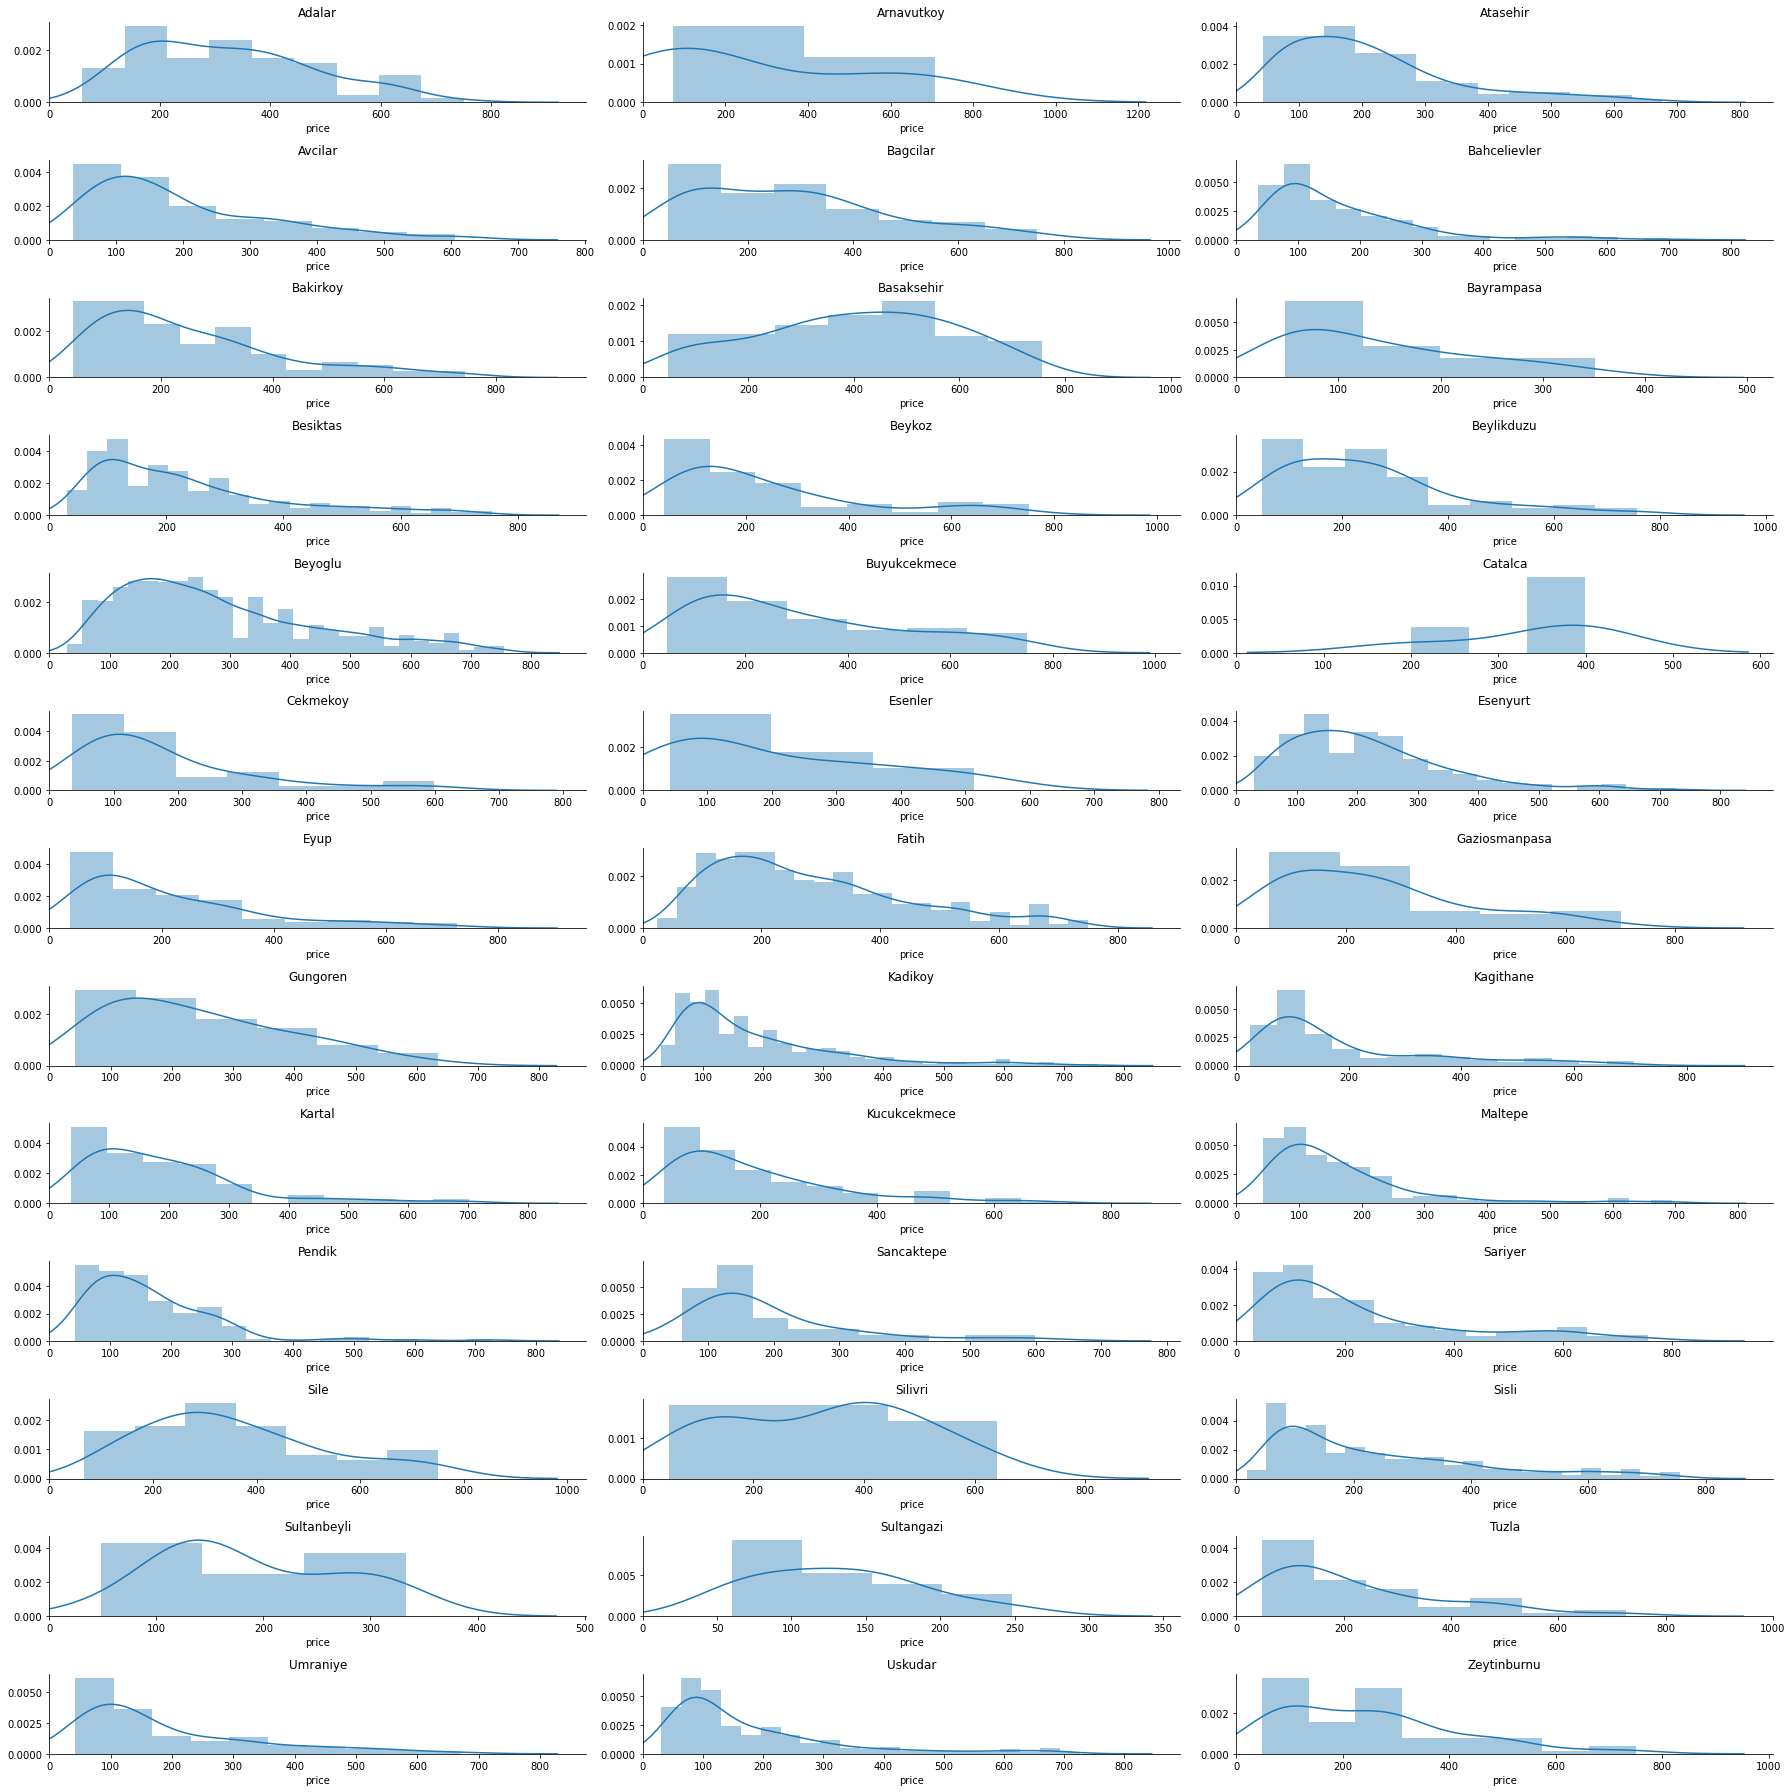

In [31]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    sns.distplot(airbnb_districts_prices.get_group(group),
                ax = ax,
                kde = True,
                hist = True)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1

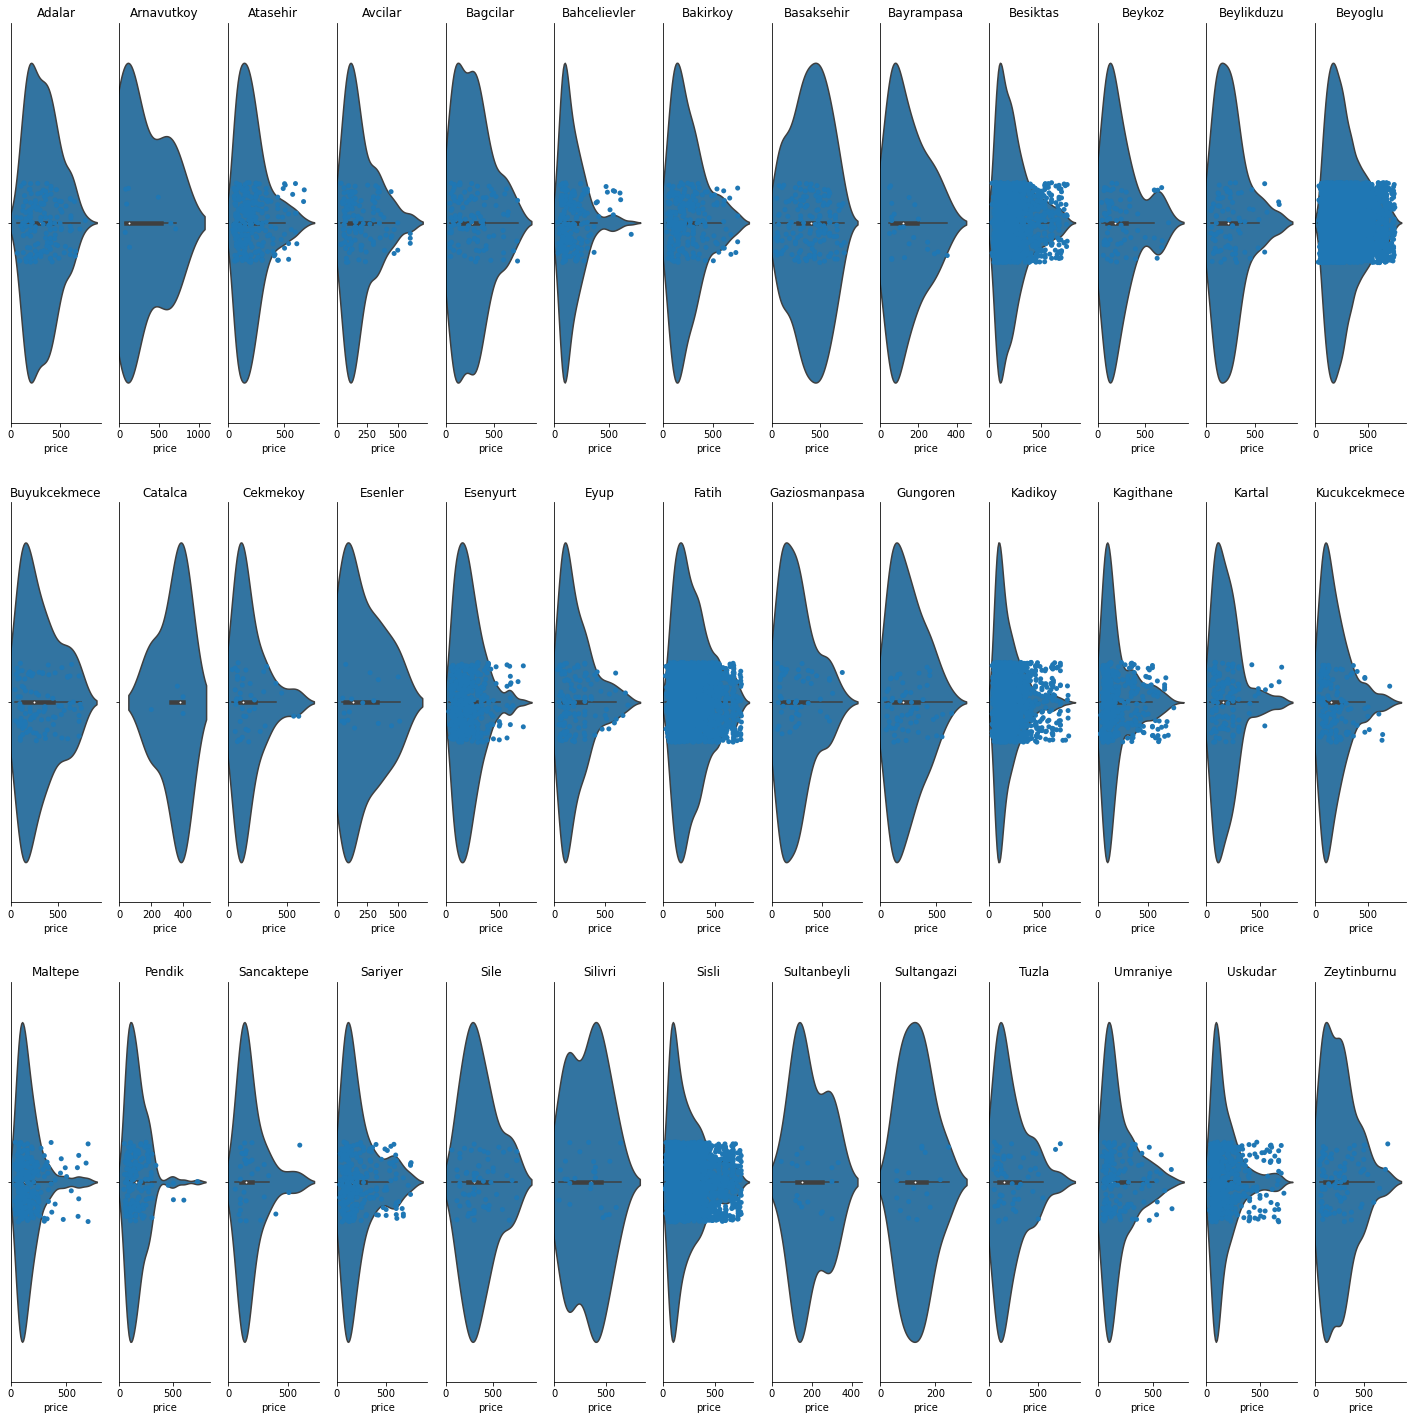

In [32]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(3, 13, i)
    
    sns.violinplot(x = airbnb_districts_prices.get_group(group),
                ax = ax)
    
    sns.stripplot(x = airbnb_districts_prices.get_group(group),
                ax = ax)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    
    i += 1

## Spatial Distribution

In [33]:
points = [Point(lonlat) for lonlat in zip(airbnb_gdf.loc[:,"longitude"], airbnb_gdf.loc[:,"latitude"])]
airbnb_gdf.geometry = points

In [38]:
istanbul_districts_gdf = istanbul_districts_gdf.merge(airbnb_listing_count_per_district,
                                               on = "district_e",
                                               how = "left")

### How many rentals in each district?

In [39]:
airbnb_listing_count_per_district = airbnb_gdf.loc[:,"district_e"].value_counts().rename_axis('district_e').reset_index(name='counts')
#ALSO ACCOUNT FOR NORMALIZATION WITH NORMALIZE = TRUE
airbnb_listing_count_per_district

,district_e,counts
0,Beyoglu,4879
1,Sisli,2707
2,Fatih,2354
3,Kadikoy,1895
4,Besiktas,1533
5,Uskudar,661
6,Esenyurt,456
7,Kagithane,431
8,Sariyer,323
9,Atasehir,292


### Spatial distribution of rentals

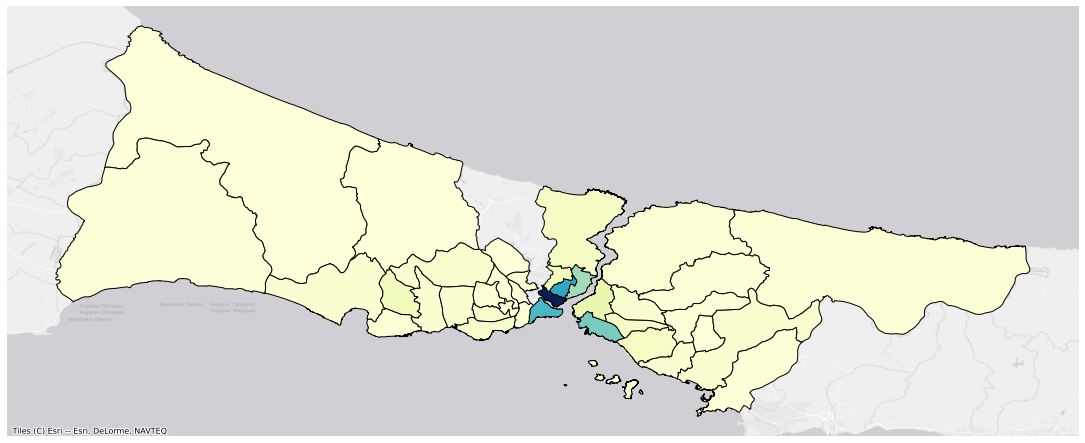

In [40]:
# --- Figure Preparation ---

fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

#                            --- MAP: ---

# --- Plot Figure ---

istanbul_districts_gdf.plot(ax = ax_1,
                    column = "counts",
                    edgecolor = "black",
                    alpha = 1,
                    cmap = cm.YlGnBu)

# --- Set Basemap ---

ctx.add_basemap(ax_1, zoom = 11, #16
                crs='epsg:4326',
                source=ctx.providers.Esri.WorldGrayCanvas)

# --- Spine and Grid ---

ax_1.set_axis_off() # Turn off axis

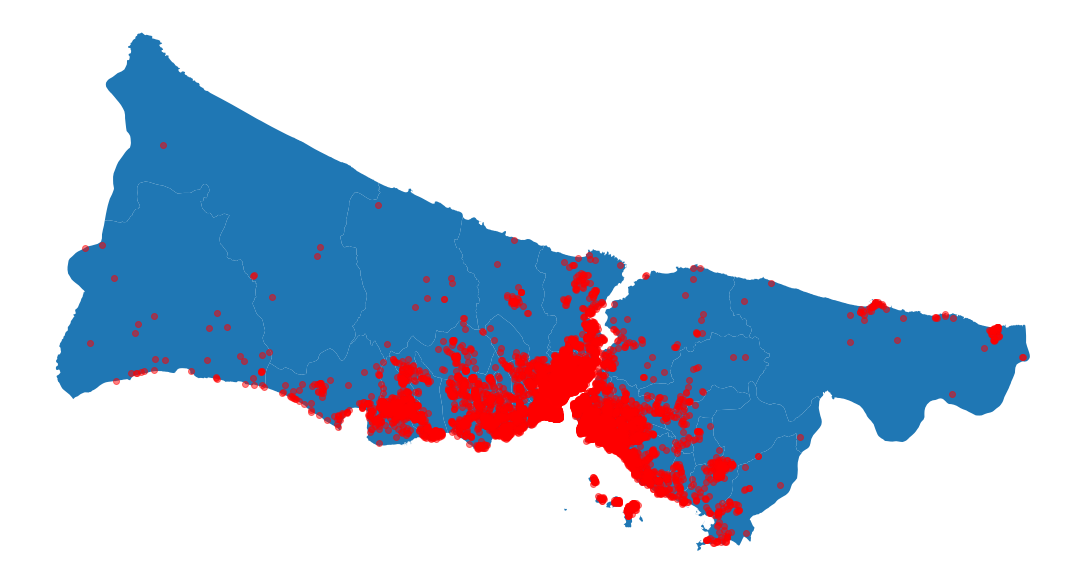

In [41]:
# --- Figure Preparation ---

fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

#                            --- MAP: ---

# --- Plot Figure ---

istanbul_districts_gdf.plot(ax = ax_1)

airbnb_gdf.plot(ax = ax_1,
               color = "red",
               alpha = 0.5)

# --- Set Basemap ---


# --- Spine and Grid ---

ax_1.set_axis_off() # Turn off axis

In [ ]:
fig = plt.figure(figsize = (19.20,19.20))

ax_1 = fig.add_subplot(1,1,1)

istanbul_districts_gdf.plot(ax = ax_1)

gplt.kdeplot(airbnb_gdf.geometry, ax = ax_1, cmap='Reds', shade = True,
             shade_lowest = True, n_levels = 20,
             clip = istanbul_districts_gdf)

ax_1.set_axis_off()

## Bivariate Analysis

In [42]:
extra_stats_df.head(5)

,district_tr,district_eng,population,yearly_average_household_income
0,Adalar,Adalar,15238,79.821
1,Arnavutköy,Arnavutkoy,282488,24.360
2,Ataşehir,Atasehir,425094,78.924
3,Avcılar,Avcilar,448882,43.938
4,Bağcılar,Bagcilar,745125,38.367


In [44]:
istanbul_districts_gdf

,OBJECTID,district_t,district_e,Shape_Leng,Shape_Area,continent,geometry,counts
0,1,Şi̇şli̇,Sisli,0.187408,0.001147,eur,"POLYGON ((29.00802 41.08488, 29.00928 41.08346...",2707.0
1,3,Şi̇le,Sile,1.862735,0.085721,anat,"POLYGON ((29.84881 41.01343, 29.84697 41.01245...",77.0
2,70,Adalar,Adalar,0.548223,0.001186,anat,"MULTIPOLYGON (((29.14379 40.85561, 29.14381 40...",170.0
3,155,Arnavutköy,Arnavutkoy,1.167397,0.048664,eur,"POLYGON ((28.64241 41.09662, 28.64213 41.09582...",10.0
4,165,Ataşehi̇r,Atasehir,0.342889,0.002713,anat,"POLYGON ((29.11148 40.95911, 29.10674 40.96328...",292.0
5,169,Çatalca,Catalca,2.228917,0.122963,eur,"POLYGON ((28.07199 41.29998, 28.07430 41.30976...",8.0
6,174,Avcilar,Avcilar,0.441871,0.005411,eur,"POLYGON ((28.74479 41.06209, 28.74531 41.06124...",128.0
7,203,Başakşehi̇r,Basaksehir,0.615359,0.011455,eur,"POLYGON ((28.83303 41.06810, 28.82897 41.06974...",183.0
8,204,Bağcilar,Bagcilar,0.243536,0.002403,eur,"POLYGON ((28.81166 41.06125, 28.81247 41.06191...",121.0
9,214,Bahçeli̇evler,Bahcelievler,0.220382,0.001788,eur,"POLYGON ((28.81095 41.02725, 28.81339 41.02669...",203.0
